<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

// h = 1..12, m = 0..59
static double angle(int h, int m) {
    double hAngle = 0.5D * (h * 60 + m);
    double mAngle = 6 * m;
    double angle = Math.abs(hAngle - mAngle);
    angle = Math.min(angle, 360 - angle);
    return angle;
}
Basically:

The hour hand moves at the rate of 0.5 degrees per minute
The minute hand moves at the rate of of 6 degrees per minute


In [223]:
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)
df['hr']=hr

# mnth = []
# for x in range(0,12):
#     mnth.append(x+1)
# df['mnth']=mnth

In [224]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))


In [225]:
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [226]:
import datetime
now = datetime.datetime.now()
print('Minute', now.minute)
print('Hour', now.hour)
print('second', now.second)

Minute 31
Hour 21
second 11


In [227]:
minute_hand = now.minute * 6

In [228]:
minute_hand_opposite = (now.minute+30) * 6

In [229]:
import time
t = time.strptime(str(now.hour), "%H")
timevalue_12hour = time.strftime( "%I", t )

In [230]:
hour_hand = (int(timevalue_12hour)*60+now.minute)*.5

In [231]:
hour_hand_opposite = ((int(timevalue_12hour)*60+now.minute)+360)*.5

In [232]:
seconds_hand = now.second * 6

In [233]:
seconds_hand_opposite = (now.second+30) * 6

In [234]:
pointhour = (.75, 0)
pointminute = (1, 0)
pointsecond = (.80, 0)
origin = (0, 0)
pointopposite = (.2,0)


In [235]:
xm, ym = rotate(origin, pointminute, math.radians(minute_hand))

In [236]:
xmo, ymo = rotate(origin, pointopposite, math.radians(minute_hand_opposite))

In [237]:
xh, yh = rotate(origin, pointhour, math.radians(hour_hand))

In [238]:
xho, yho = rotate(origin, pointopposite, math.radians(hour_hand_opposite))

In [239]:
xs, ys = rotate(origin, pointsecond, math.radians(seconds_hand))

In [240]:
xso, yso = rotate(origin, pointopposite, math.radians(seconds_hand_opposite))

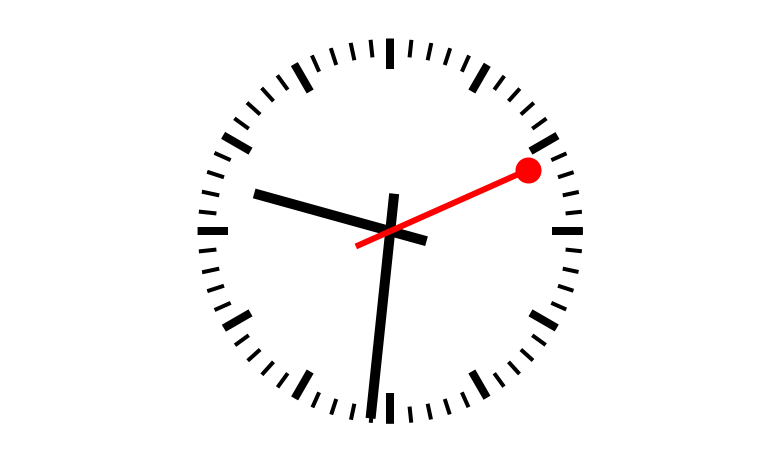

In [251]:
# https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots()


ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='white', lw=5, zorder=90))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=80, c='k', lw=2)
    
# for i, txt in enumerate(hr):
#     plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
#             horizontalalignment='center',
#             verticalalignment='center')

# ax.plot((df['hr_sin'][2]*.9, df['hr_sin'][2]*-.15),(df['hr_cos'][2]*.9, df['hr_cos'][2]*-.15), lw =5, c='black')

ax.plot((ym, 0),(xm, 0), lw =5, c='black')
ax.plot((ymo, 0),(xmo, 0), lw =5, c='black')
# ax.plot((0, 0),(0.8, 0), lw =5, c='black')
ax.plot((yh, 0),(xh,0), lw =5, c='black')
ax.plot((yho, 0),(xho,0), lw =5, c='black')
ax.scatter(0,0)


# # # ax.plot((np.sin(5)*.7,(np.sin(5)*-.2),(np.cos(5)*.7),(np.cos(5)*-.2), lw =5, c='black')

ax.plot((ys, 0),(xs,0), lw =3, marker='o',c='red', markevery=-1, markersize=12)
ax.plot((yso, 0),(xso,0), lw =3,c='red')

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()